In [26]:
# Based on single_stockexample.ipynb from pyfolio

In [21]:
import yfinance as yf
import pyfolio as pf
import matplotlib.pyplot as plt
from zipline.assets import Equity, Future
%matplotlib inline

In [22]:
# silence warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="Setting an item of incompatible dtype is deprecated")
warnings.filterwarnings("ignore", category=UserWarning, message="set_ticklabels()")

In [23]:
plt.rcParams.update({'font.size': 6, 'figure.figsize': (8, 6)})

In [4]:
meta = yf.Ticker('META')
nasdaq = yf.Ticker('^IXIC')

In [5]:
meta = meta.history(period='max')
meta

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.963766,44.907717,37.922072,38.151600,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-19 00:00:00-04:00,526.869995,531.659973,522.760010,529.280029,9879700,0.0,0.0
2024-08-20 00:00:00-04:00,528.349976,531.090027,525.880005,526.729980,7944400,0.0,0.0
2024-08-21 00:00:00-04:00,527.150024,539.400024,526.929993,535.159973,13423300,0.0,0.0


In [6]:
bench = nasdaq.history(period='max')
bench

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-19 00:00:00-04:00,17649.740234,17877.439453,17585.580078,17876.769531,5564300000,0.0,0.0
2024-08-20 00:00:00-04:00,17849.089844,17932.529297,17758.199219,17816.939453,5305260000,0.0,0.0
2024-08-21 00:00:00-04:00,17840.509766,17963.070312,17790.980469,17918.990234,4765150000,0.0,0.0


In [7]:
# modifiy nasdaq for the same dates as meta
bench = bench.loc[bench.index.isin(meta.index)]

In [8]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3086 entries, 2012-05-18 00:00:00-04:00 to 2024-08-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3086 non-null   float64
 1   High          3086 non-null   float64
 2   Low           3086 non-null   float64
 3   Close         3086 non-null   float64
 4   Volume        3086 non-null   int64  
 5   Dividends     3086 non-null   float64
 6   Stock Splits  3086 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 192.9 KB


In [9]:
returns = meta['Close'].pct_change()
returns

Date
2012-05-18 00:00:00-04:00         NaN
2012-05-21 00:00:00-04:00   -0.109861
2012-05-22 00:00:00-04:00   -0.089039
2012-05-23 00:00:00-04:00    0.032258
2012-05-24 00:00:00-04:00    0.032187
                               ...   
2024-08-19 00:00:00-04:00    0.003527
2024-08-20 00:00:00-04:00   -0.004818
2024-08-21 00:00:00-04:00    0.016004
2024-08-22 00:00:00-04:00   -0.006036
2024-08-23 00:00:00-04:00   -0.007388
Name: Close, Length: 3086, dtype: float64

In [10]:
bench_returns = bench['Close'].pct_change()
bench_returns

Date
2012-05-18 00:00:00-04:00         NaN
2012-05-21 00:00:00-04:00    0.024622
2012-05-22 00:00:00-04:00   -0.002855
2012-05-23 00:00:00-04:00    0.003889
2012-05-24 00:00:00-04:00   -0.003768
                               ...   
2024-08-19 00:00:00-04:00    0.013898
2024-08-20 00:00:00-04:00   -0.003347
2024-08-21 00:00:00-04:00    0.005728
2024-08-22 00:00:00-04:00   -0.016722
2024-08-23 00:00:00-04:00    0.014668
Name: Close, Length: 3086, dtype: float64

In [11]:
import seaborn as sns

# sns.set_context("talk", font_scale=0.5)  # Adjust scale as needed

sns.set_context("notebook", rc={
    "font.size": 6,
    "axes.titlesize": 8,
    "axes.labelsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "legend.fontsize": 6,
    "figure.titlesize": 10
})

In [12]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 6
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 6
mpl.rcParams['figure.titlesize'] = 10

In [24]:
plt.style.use('seaborn') 

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Start date,2012-05-18
End date,2024-08-23
Total months,146
,Backtest
Annual return,23.932%
Cumulative returns,1283.952%
Annual volatility,40.203%
Sharpe ratio,0.73
Calmar ratio,0.31
Stability,0.80
Max drawdown,-76.736%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,76.74,2021-09-07,2022-11-03,2024-01-19,619
1,53.62,2012-05-18,2012-09-04,2013-08-05,317
2,42.96,2018-07-25,2018-12-24,2020-01-09,382
3,34.59,2020-01-29,2020-03-16,2020-05-20,81
4,22.06,2014-03-10,2014-04-28,2014-07-24,99


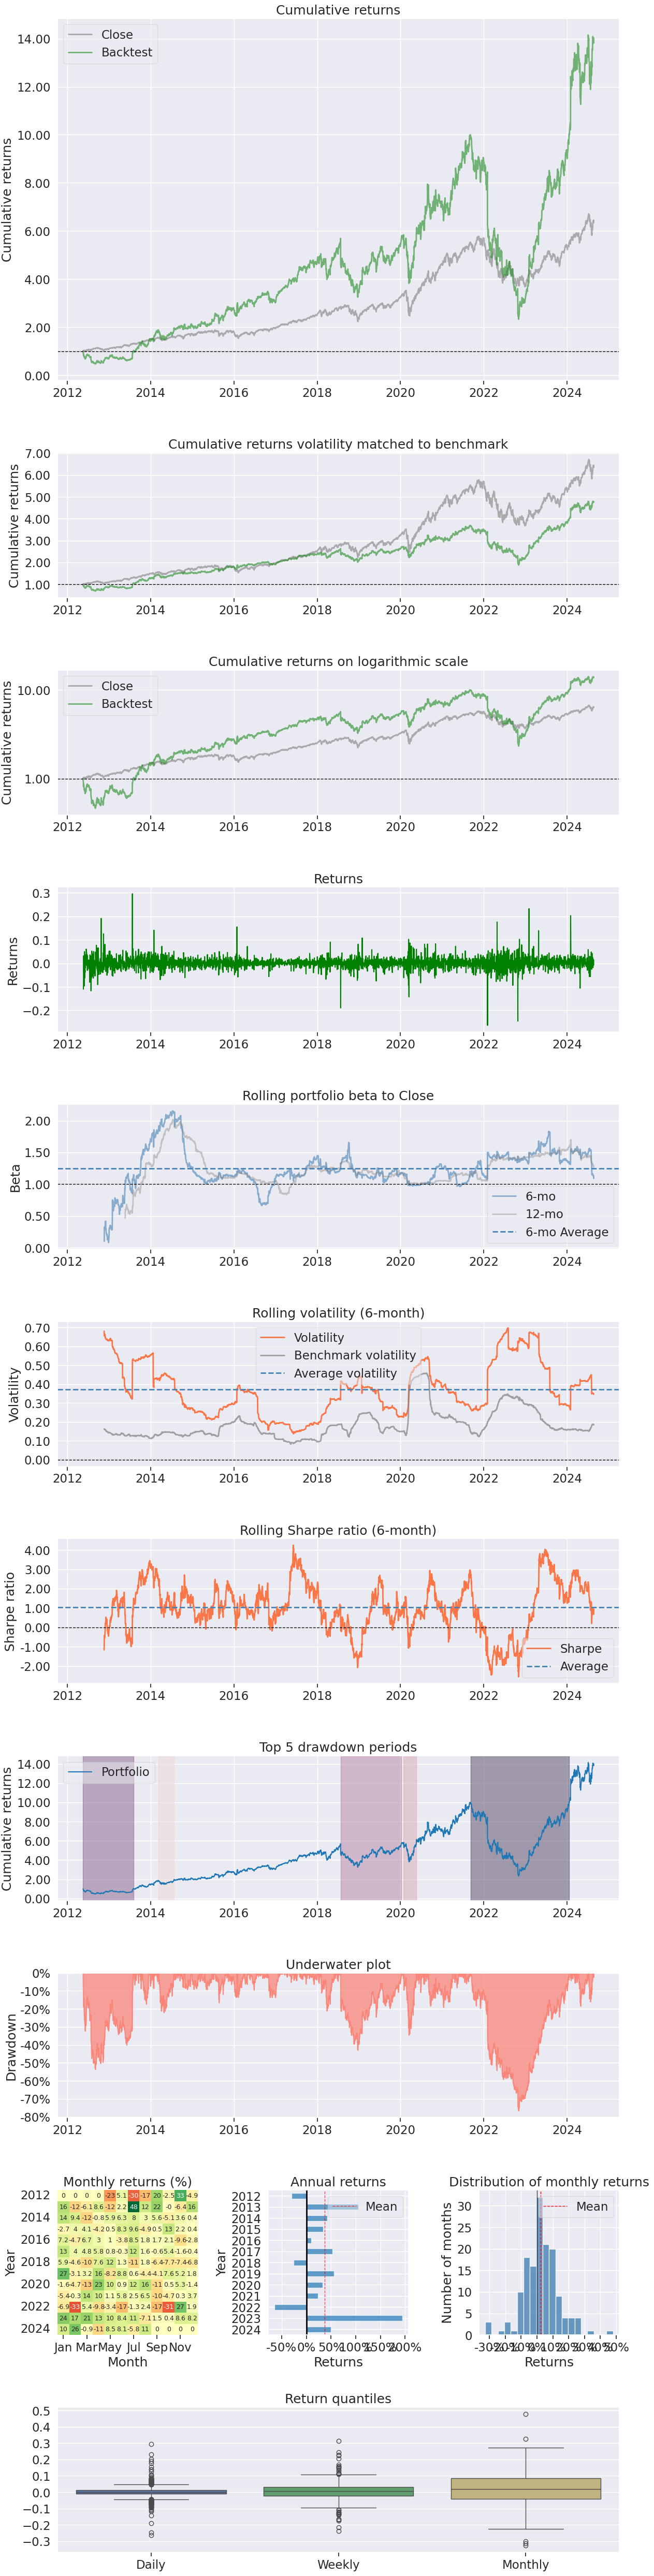

In [25]:
pf.create_returns_tear_sheet(returns,benchmark_rets=bench_returns)

Stress Events,mean,min,max
EZB IR Event,0.37%,-9.06%,7.72%
Apr14,0.02%,-5.21%,7.25%
Oct14,-0.20%,-6.08%,4.57%
Fall2015,-0.25%,-4.98%,5.05%
Recovery,-0.15%,-11.69%,19.13%
New Normal,0.15%,-18.96%,29.61%
Covid,0.12%,-26.39%,23.28%


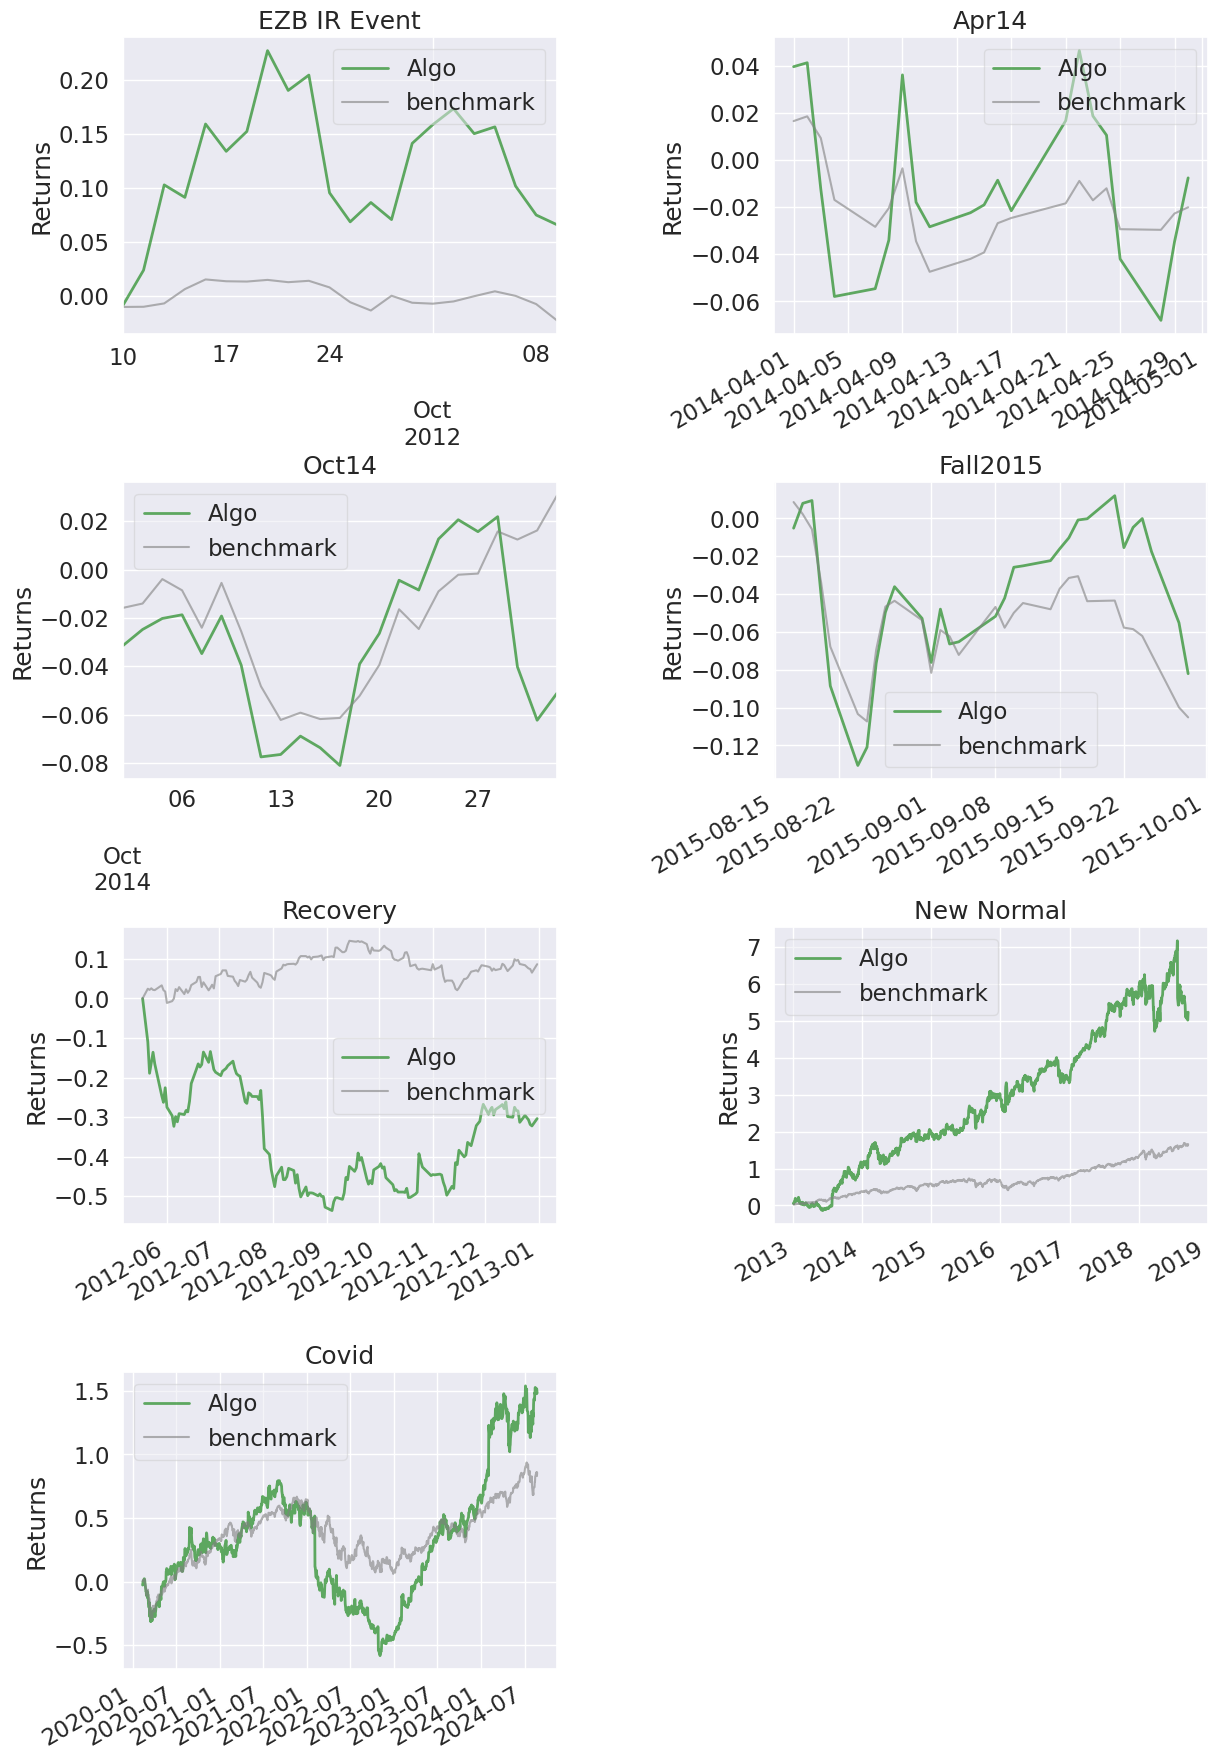

In [14]:
pf.create_interesting_times_tear_sheet(returns,benchmark_rets=bench_returns)